In [61]:
from keras.datasets import imdb

In [62]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

In [63]:
max([max(sequence) for sequence in train_data])

9999

In [79]:
word_index = imdb.get_word_index() # maps words to an integer index
reserve_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverses it mapping integer_index to word_index

# The indices are decoded and offset by 3 because 0, 1, and 2 are
# reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reserve_word_index.get(i - 3, '?') for i in train_data[0]]) 

In [80]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [65]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # sets a specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [67]:
# input data are vectors and the labels scalars
# Therefore, use fully-connected layers(Dense), and (Relu) activation function
from keras import models
from keras import layers, optimizers, losses, metrics

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))


In [68]:
# compiling the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
# model.compile(optimizer= optimizers.RMSprop(lr = 0.001), loss = losses.binary_crossentropy, metrics = metrics.binary_accuracy)



In [69]:
# setting a side a validation set
x_val = x_train[:10000]
partial_x_train =x_train[10000:]

y_val = y_train[:10000]
partial_y_train =y_train[10000:]

In [70]:
# training the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =['acc']) 

# the call to model.fit() returns a History object
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.5523 - acc: 0.7656 - val_loss: 0.4246 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3394 - acc: 0.8961 - val_loss: 0.3225 - val_acc: 0.8854
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2424 - acc: 0.9242 - val_loss: 0.2854 - val_acc: 0.8911
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1895 - acc: 0.9381 - val_loss: 0.2751 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1530 - acc: 0.9511 - val_loss: 0.2771 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1272 - acc: 0.9602 - val_loss: 0.2894 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1034 - acc: 0.9694 - val_loss: 0.3084 - val_a

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

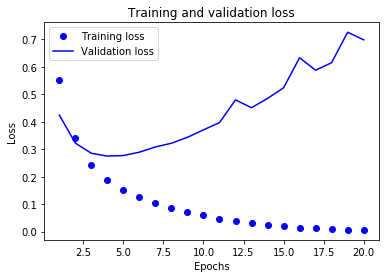

In [73]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

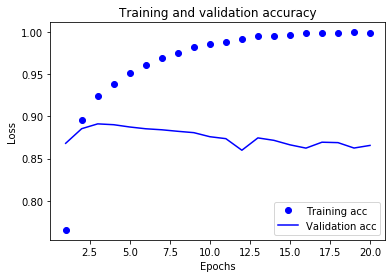

In [74]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [75]:
# stop training after the third epoch to avoid overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.4636 - accuracy: 0.8241
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2649 - accuracy: 0.9080
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2013 - accuracy: 0.9287
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [76]:
results


[0.292080179977417, 0.8846399784088135]

In [77]:

model.predict(x_test)

array([[0.18848728],
       [0.9998324 ],
       [0.881862  ],
       ...,
       [0.10292164],
       [0.0662666 ],
       [0.579246  ]], dtype=float32)